<a href="https://colab.research.google.com/github/binhvd/Data-Analytics-3-Solutions/blob/main/9_Review_Classification_with_Word_Embedding_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word2vec Word Embeddings

**Word Embeddings** : They are a real-valued vector representation of words that allows words with the same meaning to have similar representation. Thus we can say word embeddings are the projection of meanings of words in a real-valued vector 

Word2vec is a Word Embedding Technique published in 2013. The word2vec algorithm uses a neural network model to learn word associations from a large corpus of text.

It is the representation of words that allows words with the same meaning to have similar representation, Word2vec operationalizes this by projecting the meaning of the words in a vector space where words with similar meanings will tend to cluster together, and works with very different meanings are far from one another.

**Using Pre-trained word2vec word embeddings** <br>
Training your own word embeddings is a pretty expensive process (in terms of both time and computing). Thankfully, for many scenarios, it’s not necessary to train your own embeddings Someone has done the hard work of training word embeddings on a large corpus, such as Wikipedia, news articles, or even the entire web, and has put words and their corresponding vectors on the web. These embeddings
can be downloaded and used to get the vectors for the words you want.  

Some of the most popular pre-trained embeddings are Word2vec by Google, GloVe by Stanford, and fasttext embeddings by Facebook, to name a few.

Below code, cell demonstrates how to use pre-trained word2vec word embeddings.

In [ ]:
!pip install gensim
import gensim.downloader as api

# you can load a pre-trained Word Embedding model from genism-data
# this will take awhile
Word2VecModel = api.load("word2vec-google-news-300")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
print(Word2VecModel.most_similar('good'))

[('great', 0.7291510105133057), ('bad', 0.7190051078796387), ('terrific', 0.6889115571975708), ('decent', 0.6837348937988281), ('nice', 0.6836092472076416), ('excellent', 0.644292950630188), ('fantastic', 0.6407778263092041), ('better', 0.6120728254318237), ('solid', 0.5806034803390503), ('lousy', 0.5764201879501343)]


In [ ]:
print(Word2VecModel['good'])

[ 0.04052734  0.0625     -0.01745605  0.07861328  0.03271484 -0.01263428
  0.00964355  0.12353516 -0.02148438  0.15234375 -0.05834961 -0.10644531
  0.02124023  0.13574219 -0.13183594  0.17675781  0.27148438  0.13769531
 -0.17382812 -0.14160156 -0.03076172  0.19628906 -0.03295898  0.125
  0.25390625  0.12695312 -0.15234375  0.03198242  0.01135254 -0.01361084
 -0.12890625  0.01019287  0.23925781 -0.08447266  0.140625    0.13085938
 -0.04516602  0.06494141  0.02539062  0.05615234  0.24609375 -0.20507812
  0.23632812 -0.00860596 -0.02294922  0.05078125  0.10644531 -0.03564453
  0.08740234 -0.05712891  0.08496094  0.23535156 -0.10107422 -0.03564453
 -0.04736328  0.04736328 -0.14550781 -0.10986328  0.14746094 -0.23242188
 -0.07275391  0.19628906 -0.37890625 -0.07226562  0.04833984  0.11914062
  0.06103516 -0.12109375 -0.27929688  0.05200195  0.04907227 -0.02709961
  0.1328125   0.03369141 -0.32226562  0.04223633 -0.08789062  0.15429688
  0.09472656  0.10351562 -0.02856445  0.00128174 -0.0042

## Training our own embeddings

Now we’ll focus on training our own word embeddings. For this, we’ll look at two architectural variants that were proposed in the original Word2vec approach. The two variants are:

1. Continuous bag of words (CBOW)
2. SkipGram

Both of these have a lot of similarities in many respects. 

Throughout this section, we’ll use the sentence “The quick brown fox jumps over the lazy dog” as our example text.

**1. Continuous bag of words (CBOW)**

In CBOW, the primary task is to build a language model that correctly predicts the center word given the context words in which the center word appears. Consider our example sentence we take the word “jumps” as the center word, then its context is formed by words in its vicinity. If we take the context size of 2, then for our example, the context is given by brown, fox, over, the. CBOW uses the context words to predict the target word—jumps—as shown in the below figure 
<br><br>

<img src="https://drive.google.com/uc?id=1-RJkuhoYbKnp5nt481Omxg0GlZJW6MgD">

<br><br>
Now next task is to create a training sample of the form (X, Y) for this task where X will be context words and Y will be Center word. We define the value of context window = 2 in this case. 

<img src="https://drive.google.com/uc?id=1-SHpn2rS1-Qd8Nz-mtczRlb-84e8nwNd">

<br><br>
Now that we have the training data ready, let’s focus on the model. For this, we construct a shallow net (it’s shallow since it has a single hidden layer). We assume we want to learn D-dim word embeddings. Further, let V be the vocabulary of the text corpus

<img src="https://drive.google.com/uc?id=1-T-XNzSrMKzXEkF3fzNx1VaKnroZ76yP">

<br><br>
The objective is to learn an embedding matrix E|V| x d.To begin with, we initialize the matrix randomly. Here, |V| is the size of corpus vocabulary and d is the dimension of the embedding. Let’s break down the shallow net in Figure layer by layer. In the input layer, indices of the words in context are used to fetch the corresponding rows from the embedding matrix E|V| x d. The vectors fetched are then added to get a single D-dim vector, and this is passed to the next layer. The next layer simply takes this d vector and multiplies it with another matrix E’d x |V|.. This gives a 1 x |V| vector, which is fed to a softmax function to get probability distribution over the vocabulary space. This distribution is compared with the label and uses backpropagation to update both the matrices E and E’ accordingly. At the end of the training, E is the embedding matrix we wanted to learn.

**2. SkipGram** 

SkipGram is very similar to CBOW, with some minor changes. In Skip‐ Gram, the task is to predict the context words from the center word. For our toy corpus with context size 2, using the center word “jumps,” we try to predict every word in context—“brown,” “fox,” “over,” “the”—as shown in the Figure below 

<img src="https://drive.google.com/uc?id=1-hWnCt1IzcArk_dzCTBOt8tqMehDwI9t">

Now we will create a training sample of the form (X, Y) for this task where X will be the center word and Y will be Context words. 

<br>
<br>

<img src="https://drive.google.com/uc?id=1-W9PbbUt7LnnBSd9EpDfKRXVmp6d8nFR">

<br>
<br>

<img src="https://drive.google.com/uc?id=1-hlD6fev7YSxm_bauLoDLFeAR1ul7YXA">

<br>
<br>

The shallow network used to train the SkipGram model, shown in the below Figure, is very similar to the network used for CBOW, with some minor changes. In the input layer, the index of the word in the target is used to fetch the corresponding row from the embedding matrix E|V| x d. The vectors fetched are then passed to the next layer. The next layer simply takes this d vector and multiplies it with another matrix E’d x |V|. This gives a 1 x |V| vector, which is fed to a softmax function to get probability distribution over the vocabulary space. This distribution is compared with the label and uses backpropagation to update both the matrices E and E’ accordingly. At the end of the training, E is the embedding matrix we wanted to learn.

**Implementation** : 

One of the most commonly used implementations is with gensim. We have to choose several hyperparameters (i.e., the variables that need to be set before starting the training process). Let’s look at two examples.

Dimensionality of the word vectors

As the name indicates, this decides the space of the learned embeddings. While there is no ideal number, it’s common to construct word vectors with dimensions in the range of 50–500 and evaluate them on the task we’re using them for to choose the best option. In gensim we do this by setting the "size" parameter to the size we want. 

Context window

How long or short the context we look for to learn the vector representation is. In gensim we do this by setting the "window" parameter to the size we want.

There are also other choices we make, such as whether to use CBOW or SkipGram to
learn the embeddings.

**Next few code cells shows implementation of CBOW**

In [ ]:
from gensim.test.utils import common_texts
from gensim.models.word2vec import Word2Vec

print("Sentences on which We are gonna train our CBOW Word2Vec Model:\n")
print(common_texts)

Our_CBOW_Word2Vec_Model = Word2Vec(common_texts, size = 10, window = 5, min_count = 1, workers = 8, sg = 0)
Our_CBOW_Word2Vec_Model.save("Our_CBOW_Word2Vec_Model.w2v")
print("Model Saved")

Sentences on Which We are gonna train our CBOW Word2Vec Model:

[['human', 'interface', 'computer'], ['survey', 'user', 'computer', 'system', 'response', 'time'], ['eps', 'user', 'interface', 'system'], ['system', 'human', 'system', 'eps'], ['user', 'response', 'time'], ['trees'], ['graph', 'trees'], ['graph', 'minors', 'trees'], ['graph', 'minors', 'survey']]


In [ ]:
Our_CBOW_Word2Vec_Model.wv.most_similar('human', topn = 5)

[('trees', 0.24544048309326172),
 ('computer', 0.22442901134490967),
 ('survey', 0.18114595115184784),
 ('eps', 0.15529023110866547),
 ('time', 0.14845068752765656)]

In [ ]:
Our_CBOW_Word2Vec_Model.wv['human']

array([ 0.01075479, -0.02941094, -0.00564298, -0.01166977,  0.0051891 ,
       -0.02703873,  0.0309984 , -0.01970048,  0.0256852 , -0.00487037],
      dtype=float32)

## Glove Word Embeddings

GloVe Stands for Global Vectors for word representation is another word embedding technique that was developed as an open-source project at Stanford and was launched in 2014. Just to refresh, word vectors put words to a nice vector space, where similar words cluster together and different words repel. The advantage of GloVe is that, unlike Word2vec, GloVe does not rely just on local statistics (local context information of words), but incorporates global statistics (word co-occurrence) to obtain word vectors. But keep in mind that there’s quite a bit of synergy between the GloVe and Word2vec. The gloVe can be used to find relations between words like synonyms, company-product relations, zip codes, and cities, etc.

The question may arise Why do we need Glove if we have word2vec as a good word embedding technique Because Word2vec relies only on local information of language. That is, the semantics learned for a given word, are only affected by the surrounding words.

For example, take the sentence,

The cat sat on the mat

If you use Word2vec, it wouldn’t capture information like,

is “the” a special context of the words “cat” and “mat” ?

or

is “the” just a stopword?

This can be suboptimal, especially in the eye of theoreticians.

GloVe method is built on an important idea, You can derive semantic relationships between words from the co-occurrence matrix. Given a corpus having V words, the co-occurrence matrix X will be a V x V matrix, where the i th row and j th column of X, X_ij denotes how many times word i has co-occurred with word j. An example co-occurrence matrix might look as follows.

![](https://miro.medium.com/max/434/1*QWcK8CIDs8kMkOwsOxvywA.png)

The co-occurrence matrix for the sentence “the cat sat on the mat” with a window size of 1. As you probably noticed it is a symmetric matrix.

For detailed knowledge about Glove word embedding, you can refer [This article](https://towardsdatascience.com/light-on-math-ml-intuitive-guide-to-understanding-glove-embeddings-b13b4f19c010)

In [ ]:
!wget https://github.com/allenai/spv2/raw/master/model/glove.6B.100d.txt.gz
!gzip -d glove.6B.100d.txt.gz

--2022-10-17 09:06:38--  https://github.com/allenai/spv2/raw/master/model/glove.6B.100d.txt.gz
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/allenai/spv2/master/model/glove.6B.100d.txt.gz [following]
--2022-10-17 09:06:38--  https://media.githubusercontent.com/media/allenai/spv2/master/model/glove.6B.100d.txt.gz
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134409071 (128M) [application/octet-stream]
Saving to: ‘glove.6B.100d.txt.gz’

glove.6B.100d.txt.g 100%[===================>] 128.18M   248MB/s    in 0.5s    

2022-10-17 09:06:42 (248 MB/s) - ‘glove.6B.100d.txt.gz’ saved 

In [ ]:
!tail glove.6B.100d.txt

sigarms 0.18917 -0.3181 -0.43749 0.61209 -0.031357 0.1568 0.30505 -0.39915 0.30101 -0.17353 -0.032278 -0.29338 -0.16598 -0.15038 -0.29364 -0.062909 -0.32706 0.13117 0.010177 0.078467 -0.32796 0.008198 -0.34072 0.1286 -0.27844 0.41588 -0.045799 0.45221 -0.065252 -0.055483 0.50665 -0.067356 -0.29428 -0.12657 -0.024669 -0.37284 0.23507 -0.48212 0.041255 -0.081911 0.59964 0.2047 -0.23401 -0.34091 -0.13306 0.36 -0.00697 0.6013 0.50416 0.099127 -0.031218 0.40532 -0.16901 -0.4664 0.14094 0.74539 0.15076 0.18017 -0.51756 -0.59651 -0.20991 -0.5506 -0.023214 -0.4166 -0.33079 -0.048234 -0.16065 0.36674 0.0072976 0.051298 -0.38274 0.57222 -0.34032 0.16816 -0.40298 -0.12421 0.16196 -0.15993 0.43126 -0.4145 -0.48541 -0.28735 0.34193 -0.029869 0.70822 0.01381 -0.034878 -0.26084 0.20595 0.64408 -0.056202 -0.1277 0.28507 -0.16824 -0.018927 -0.24652 -0.10403 0.32856 -0.43073 -0.10308
katuna -0.21887 -0.30785 -0.28557 0.36186 -0.20892 -0.011439 -0.39597 0.27104 0.51042 -0.29147 -0.18927 0.167 -0.043189 -

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec

# convert GloVe file to Word2Vec file
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec("glove.6B.100d.txt", word2vec_output_file)

(400000, 100)

In [ ]:
from gensim.models import KeyedVectors

# load the Stanford GloVe model
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

In [ ]:
print("Most similar words to word 'human' : ")
glove_model.most_similar('human')

Most similar words to word 'human' : 


[('animal', 0.7462460994720459),
 ('rights', 0.7322573661804199),
 ('humans', 0.6607712507247925),
 ('animals', 0.6567643284797668),
 ('body', 0.6552971601486206),
 ('nature', 0.6483666896820068),
 ('beings', 0.6467737555503845),
 ('organization', 0.6319880485534668),
 ('scientific', 0.630841076374054),
 ('common', 0.6211239099502563)]

In [ ]:
print("Glove Word Embeddings of word 'human' ")
glove_model['human']

Glove Word Embeddings of word 'human' 


array([ 3.3864e-01,  5.9663e-01,  5.3322e-01,  3.1404e-01,  1.5321e-01,
        3.1749e-01, -4.2940e-01, -2.9150e-01, -2.1047e-03, -3.9309e-01,
       -8.5441e-01, -8.0708e-02,  1.2118e+00,  6.9316e-02,  8.0613e-03,
        8.7888e-01,  3.1908e-02,  5.8655e-01, -5.4892e-01, -7.8468e-03,
        1.7327e-01, -2.6693e-01,  4.2802e-01,  6.6123e-02,  5.1847e-01,
        7.7226e-01,  2.0608e-01, -4.5836e-01,  3.5485e-01,  7.1547e-01,
        6.0855e-01,  2.0254e-01, -4.8756e-01,  5.7974e-01,  8.6728e-02,
       -5.1852e-01, -3.7274e-01,  1.0014e+00, -2.9259e-01,  3.2290e-01,
       -9.7563e-01, -2.2288e-01, -2.3335e-01, -2.6891e-01,  1.4612e-01,
        1.2004e-01, -2.0402e-01, -9.4647e-02, -1.5402e+00, -5.9510e-02,
        1.0887e+00, -2.4998e-01, -2.5808e-01,  1.2798e+00, -1.2849e-01,
       -1.4511e+00, -2.4686e-01, -9.5046e-02,  1.7425e+00,  1.1977e-01,
       -1.9206e-01,  4.4368e-01, -1.6453e-01, -7.6663e-01,  1.1100e+00,
        4.6748e-01, -2.4673e-02,  4.7179e-03,  6.9761e-01, -2.29

## FastText Word Embeddings

A word can be represented by its constituent character ngrams. Following a similar architecture to Word2vec, fastText learns embeddings for words and character n-grams together and views a word’s embedding vector as an aggregation of its constituent character n-grams. This makes it possible to generate embeddings even for words that are not present in the vocabulary. Say there’s a word, “gregarious,” that’s not found in the embedding’s word vocabulary. We break it into character n-grams—gre, reg, ega, ….ous—and combine these embeddings of the ngrams to arrive at the embedding of “gregarious.”

How FastText Works?

FastText is a modified version of word2vec (i.e.. Skip-Gram and CBOW). The only difference between fastText vs word2vec is its pooling strategies (what are the input, output, and dictionary of the model). In word2vec each word is represented as a bag of words but in FastText each word is represented as a bag of character n-gram.

**character n-grams** the contiguous sequence of n items from a given sample of a character or word. It may be bigram, trigram, etc.
For example character trigram (n = 3) of the word “where” will be:

<wh, whe, her, ere, re>

In FastText architecture, they have also included the word itself with the character n-gram. That means input data to the model for the word “eating” will be:

![](https://amitness.com/images/fasttext-center-word-embedding.png)

Now the model I am referring same is word2vec which is a shallow neural network with one hidden layer as discussed above.


Now to prepare training data for the (Skip-Gram-based) FastText model, we define “context word” as the word which follows a given word in the text (which will be our “target word”). That means we will be predicting the surrounding word for a given word.

Note: FastText word embeddings support both Continuous Bag of Words (CBOW) and Skip-Gram models. I will explain and implement the skip-gram model in the below cell to learn vector representation (FastText word embeddings). Now let’s construct our training examples (like Skip-Gram), scanning through the text with a window will prepare a context word and a target word.

Consider the sentence : 

<div style = "text-align:center"><b> i like natural language processing</b></div>

![](https://secureservercdn.net/45.40.148.234/um0.ec8.myftpupload.com/wp-content/uploads/2020/10/Picture2.png)

For the above example, for context words “i” and “natural” the target word will be “like”. Full training data for FastText word embedding will look like below. By observing the below training data, your confusion of fastText vs word2vec should be clear.


Now you know in word2vec (skip-gram) each word is represented as a bag of words but in FastText each word is represented as a bag of character n-gram. This training data preparation is the only difference between FastText word embeddings and skip-gram (or CBOW) word embeddings.

After training data preparation of FastText, training the word embedding, finding word similarity, etc. are the same as the word2vec model (for our example similar to the skip-gram model).

Now let’s see how to implement FastText word embeddings in python using Gensim library.


In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
!unzip wiki-news-300d-1M.vec.zip

--2022-10-17 09:01:42--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 172.67.9.4, 104.22.74.142, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|172.67.9.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M  15.9MB/s    in 33s     

2022-10-17 09:02:15 (19.7 MB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]

Archive:  wiki-news-300d-1M.vec.zip
  inflating: wiki-news-300d-1M.vec   


In [ ]:
from gensim.models import FastText, KeyedVectors

# this will take forever
fasttext_model = KeyedVectors.load_word2vec_format('wiki-news-300d-1M.vec') # equals to api.load("fasttext-wiki-news-subwords-300")
print("Most similar words to word 'human': ")
fasttext_model.most_similar('human')

Most similar words to word 'human': 


[('non-human', 0.7691742181777954),
 ('Human', 0.7620595693588257),
 ('nonhuman', 0.7084147930145264),
 ('beings', 0.7024695873260498),
 ('humans', 0.69742751121521),
 ('animal', 0.6924617886543274),
 ('humanity', 0.6476197838783264),
 ('human-', 0.6355128288269043),
 ('mammalian', 0.6191366910934448),
 ('natural', 0.6171244978904724)]

In [ ]:
print("FastText Word Embeddings of the word 'human'")
fasttext_model['human']

FastText Word Embeddings of the word 'human'


array([ 8.800e-03, -1.230e-02,  3.650e-02,  1.136e-01, -8.000e-03,
        1.574e-01,  9.080e-02,  1.293e-01, -1.400e-03,  1.081e-01,
       -8.610e-02, -3.450e-02, -5.610e-02,  3.300e-03, -4.000e-04,
        1.650e-02,  8.540e-02,  4.670e-02, -1.632e-01,  6.200e-02,
        5.800e-03,  1.162e-01, -7.390e-02,  1.525e-01, -6.330e-02,
        6.780e-02, -1.114e-01, -3.440e-02,  4.310e-02,  6.050e-02,
       -1.349e-01,  5.660e-02, -7.210e-02,  1.785e-01,  5.520e-02,
       -8.580e-02, -7.610e-02,  1.387e-01, -3.760e-02,  8.000e-03,
        1.093e-01, -6.550e-02,  7.130e-02, -1.020e-01, -6.250e-02,
       -6.340e-02, -6.770e-02, -8.940e-02,  5.400e-03,  6.740e-02,
       -8.720e-02,  1.085e-01, -7.148e-01,  5.700e-03, -4.660e-02,
        3.980e-02, -7.630e-02,  9.780e-02, -3.300e-03,  1.379e-01,
       -1.192e-01,  3.700e-03, -1.599e-01, -9.340e-02, -1.021e-01,
       -2.812e-01,  1.539e-01, -2.750e-02, -3.230e-02, -3.860e-02,
       -1.403e-01, -7.450e-02, -7.510e-02,  1.232e-01,  8.800e

Training our own fasttext model using python's gensim library by settings up below listed hyperparameters:


- size: Dimensionality of the word vectors. 
- window: window size.
- min_count: The model ignores all words with total frequency lower than this.
- sample: The threshold for configuring which higher-frequency words are randomly down sampled, useful range is (0, 1e-5).
- workers: Use these many worker threads to train the model (=faster training with multicore machines).
- sg: Training algorithm: skip-gram if sg=1, otherwise CBOW.
- iter: Number of iterations (epochs) over the corpus.

In [ ]:
from gensim.models import FastText
from gensim.test.utils import common_texts

our_fasttext_model = FastText(common_texts, size = 100, min_count = 1, window = 5, sg = 1)

In [ ]:
print("Most Similar words of word 'computer' : ")
our_fasttext_model.wv.most_similar('computer')

Most Similar words of word 'computer' : 


[('response', 0.14416807889938354),
 ('trees', 0.1423281729221344),
 ('interface', 0.059419989585876465),
 ('survey', 0.05780816078186035),
 ('user', 0.04733406752347946),
 ('eps', 0.008394613862037659),
 ('human', -0.04660790041089058),
 ('time', -0.051933951675891876),
 ('system', -0.06607337296009064),
 ('minors', -0.16495515406131744)]

In [ ]:
# Word Embedding for the word "computer"
our_fasttext_model.wv['computer']

array([ 2.1286066e-04,  1.0580663e-03, -2.2376154e-03,  5.2260025e-04,
        5.2873517e-04, -2.3151691e-04, -1.5589088e-04,  2.0226570e-04,
       -3.1903835e-03,  1.6490557e-03, -5.4424683e-05, -2.6254871e-04,
       -1.0331337e-03, -8.9286076e-04,  1.1941320e-03,  5.8650126e-04,
       -4.1125005e-04,  9.8196918e-04,  1.0749986e-03,  5.5427826e-04,
        8.7111566e-04, -9.9337485e-05, -5.4518157e-04, -8.0522121e-04,
       -7.1303942e-04, -2.6796493e-05, -9.9930898e-05,  1.0223496e-04,
       -1.8784079e-03, -2.1518854e-04, -1.1238595e-03, -1.9411143e-04,
       -1.3706944e-04, -1.9029799e-03, -8.3387410e-04,  1.0304676e-03,
        1.5214080e-03, -2.2575969e-03, -1.2322196e-03,  1.9731469e-04,
       -1.2151604e-03, -9.5418456e-04, -1.3557049e-03, -4.8256738e-04,
       -4.6164484e-04, -2.2357256e-04, -2.5121297e-03, -6.6767773e-04,
       -4.7834101e-04, -5.0782121e-04, -1.0249245e-03, -1.5683008e-03,
       -8.2716858e-04, -5.4294540e-04,  4.2148493e-04,  4.8013063e-04,
      

**Important Points Regarding Word Embeddings**

1. All text representations are **inherently biased** based on what they saw in training data. For example, an embedding model trained heavily on technology news or articles is likely to identify Apple as being closer to, say, Microsoft or Facebook than to an orange or pear.

2. Unlike the basic vectorization approaches, pre-trained embeddings are generally **large-sized files (several gigabytes)**, which may pose problems in certain deployment scenarios. This is something we need to address while using them, otherwise, it can become an engineering bottleneck in performance. The Word2vec model takes ~4.5 GB RAM.

## Visualizing Embeddings


So far, we’ve seen various vectorization techniques for representing text. The vectors obtained are used as features for the NLP task at hand. An important aspect of any ML project is feature exploration. Visual exploration is a very important aspect of any data-related problem. Even though embeddings are low-dimensional vectors, even
100 or 300 dimensions are too high to visualize.

t-SNE, or t-distributed Stochastic Neighboring Embedding help us solve this problem. It’s a technique used for visualizing high-dimensional data like embeddings by reducing them to two or three-dimensional data. The technique takes in the embeddings (or any data) and looks at how to best represent the input data using lesser dimensions, all while maintaining the same data distributions in original high-dimensional input space and low-dimensional output space. This, therefore, enables us to plot and visualize the input data. It helps to get a feel for the space of word embedding.

Now lets plot scatter plots of most-similar words in the vocabulary of different embedding schemes. 

In [ ]:
# Visualizing Word2vec Word Embedding 
keys = ['Germany', 'good', 'friday', 'science', 'Twitter', 'masters', 'computer', 'election', 'costly',
        'learning', 'finance', 'machine', 'android', 'peace', 'nature', 'war']

words_clusters = []
embeddings_clusters = []

for word in keys:
    words = []
    embeddings = []
    
    for similar_word, _ in Word2VecModel.most_similar(word, topn = 30):
        words.append(similar_word)
        embeddings.append(Word2VecModel[word])
    words_clusters.append(words)
    embeddings_clusters.append(embeddings)


In [ ]:
from sklearn.manifold import TSNE
import numpy as np

embedding_array = np.array(embeddings_clusters)
n, m, k = embedding_array.shape

tsne_2d_model = TSNE(perplexity = 15, n_components = 2, n_iter = 4000, random_state = 11, init = 'pca')
tsne_embeddings = np.array(tsne_2d_model.fit_transform(embedding_array.reshape(n * m, k))).reshape(n, m, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
%matplotlib inline

def plot_most_similar_words(labels, embedding_cluster, word_cluster, title):
    
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    plt.figure(figsize = (16,9))
    for label, embeddings, words, color in zip(labels, embedding_cluster, word_cluster, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=0.7, label=label)
    plt.legend(loc = 4)
    plt.title(title)
    plt.grid(True)
    plt.show()

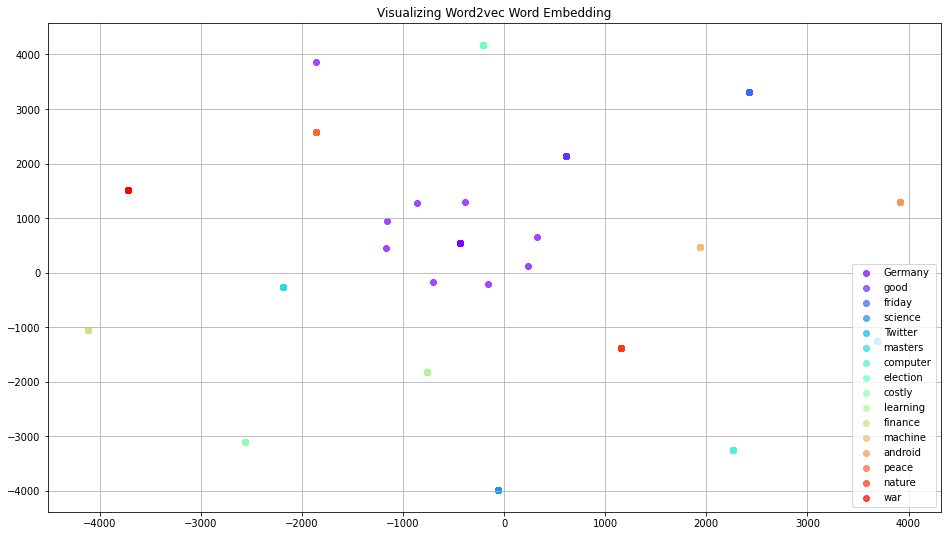

In [ ]:
plot_most_similar_words(keys, tsne_embeddings, words_clusters, "Visualizing Word2vec Word Embedding")

# Text Classification - Deep Learning CNN Models

<img src="https://github.com/dipanjanS/nlp_workshop_dhs18/blob/master/Unit%2012%20-%20Project%209%20-%20Sentiment%20Analysis%20-%20Supervised%20Learning/banner.jpeg?raw=1">

When it comes to text data, sentiment analysis is one of the most widely performed analysis on it. Sentiment Analysis has been through tremendous improvements from the days of classic methods to recent times where in the state of the art models utilize deep learning to improve the performance.

Convolutional Neural Networks or CNNs are the work-horse of the deep learning world. They have, in some sense, brought deep learning research into mainstream discussions. The advancements in the image classification world has left even humans behind.

<img src="https://github.com/dipanjanS/nlp_workshop_dhs18/blob/master/Unit%2012%20-%20Project%209%20-%20Sentiment%20Analysis%20-%20Supervised%20Learning/cnn.png?raw=1">
In this project, we will attempt at performing sentiment analysis utilizing the power of CNNs.

In [ ]:
!pip install contractions
!pip install textsearch
!pip install tqdm

import nltk
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 4.9 MB/s 
     |████████████████████████████████| 106 kB 68.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
import numpy as np

# fix random seed for reproducibility
seed = 42
np.random.seed(seed)

## Load Movie Review Dataset

In [ ]:
dataset = pd.read_csv(r'https://github.com/dipanjanS/nlp_workshop_dhs18/raw/master/Unit%2011%20-%20Sentiment%20Analysis%20-%20Unsupervised%20Learning/movie_reviews.csv.bz2', compression='bz2')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
# take a peek at the data
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


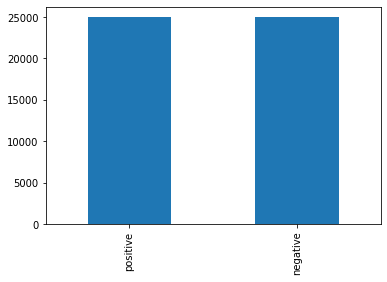

In [ ]:
dataset["sentiment"].value_counts().plot(kind="bar")

# Text Wrangling & Normalization

**Text Preprocessing** is traditionally an important step for **Natural Language Processing (NLP)** tasks. It transforms text into a more digestible form so that machine learning algorithms can perform better.

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = stopwords.words('english')
stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import contractions
from bs4 import BeautifulSoup
import re
import tqdm
import unicodedata

from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer('english')

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text

def remove_stopwords_and_stemming(text, stem):
    tokens = []
    for token in text.split():
      if token not in stopwords:
        # chops off the ends of words
        if stem:
          tokens.append(stemmer.stem(token))
        else:
          tokens.append(token)
    return " ".join(tokens)   

def pre_process_corpus(docs, stem = False):
    norm_docs = []
    # tqdm to display a progess bar while looping
    for doc in tqdm.tqdm(docs):
        # remove HTML tags
        doc = strip_html_tags(doc)

        # convert tab, new lines to empty spaces    
        doc = doc.translate(doc.maketrans("\n\t\r", "   "))

        # lowercase
        doc = doc.lower()

        # remove accented chars
        doc = unicodedata.normalize('NFKD', doc).encode('ascii', 'ignore').decode('utf-8', 'ignore')

        # expand shortened words, e.g. don't to do not
        doc = contractions.fix(doc)

        # Replace all non alphabets.
        doc = re.sub('[^a-zA-Z]', ' ', doc)

        # Single character removal
        doc = re.sub(r"\s+[a-zA-Z]\s+", ' ', doc)
        
        # remove white spaces
        doc = re.sub(' +', ' ', doc)
        doc = doc.strip()  

        # remove stop words and apply stemming
        doc = remove_stopwords_and_stemming(doc, stem)

        norm_docs.append(doc)        
    return norm_docs

In [ ]:
dataset['review'] = pre_process_corpus(dataset['review'])

100%|██████████| 50000/50000 [00:26<00:00, 1913.61it/s]


In [ ]:
dataset.head()

,review,sentiment
0,one reviewers mentioned watching oz episode ho...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake thinks zombie...,negative
4,petter mattei love time money visually stunnin...,positive


### Positive Words

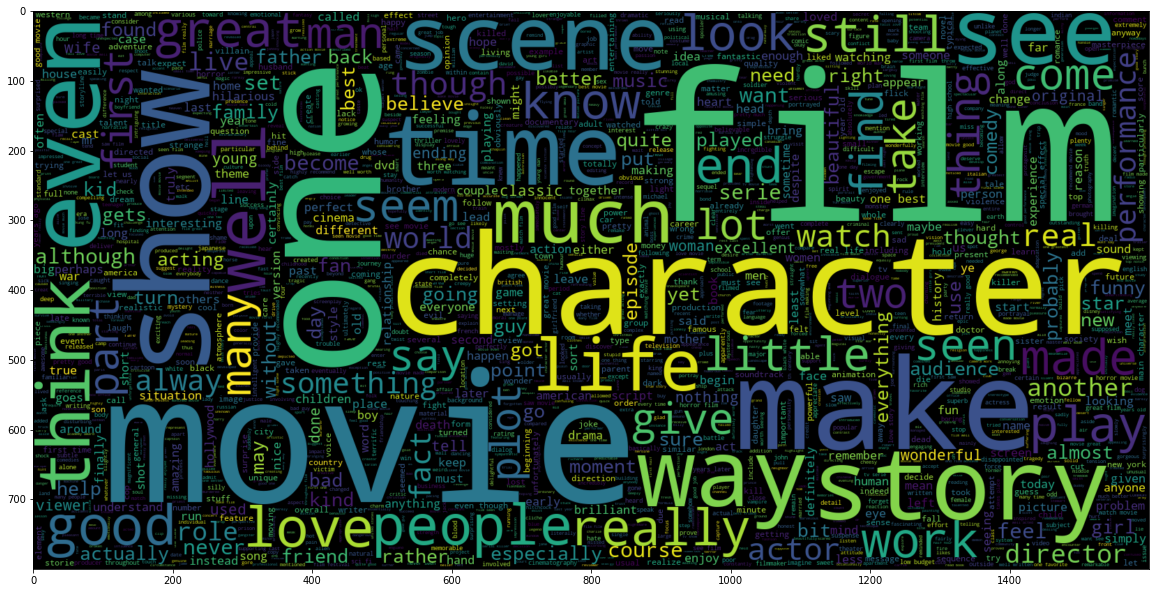

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(dataset[dataset.sentiment == 'positive'].review))
plt.imshow(wc , interpolation = 'bilinear')

### Negative Words

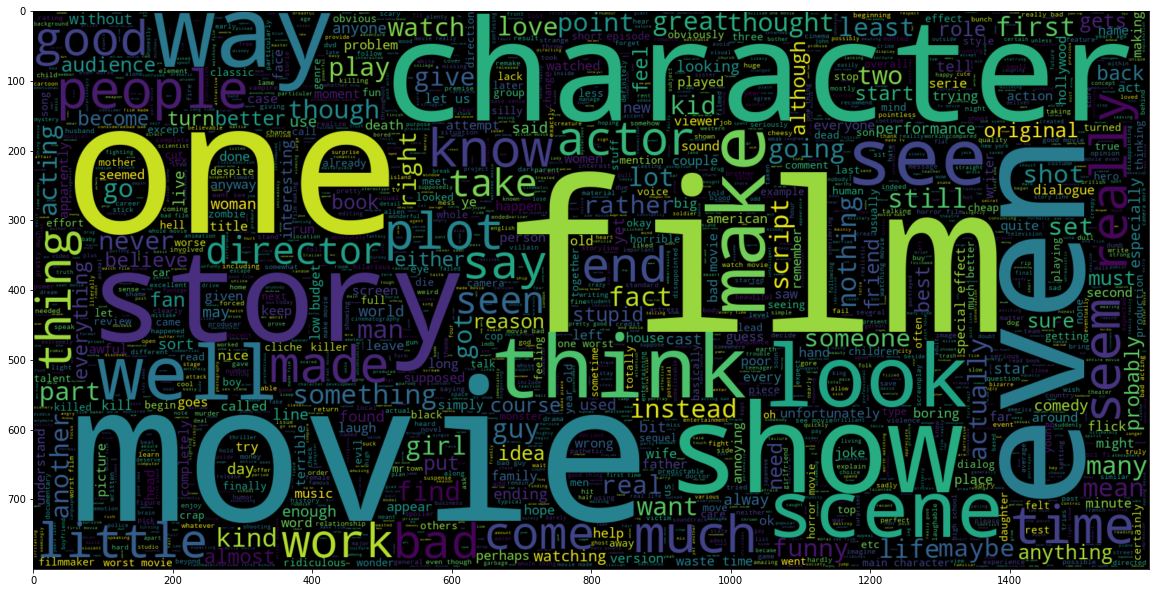

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(dataset[dataset.sentiment == 'negative'].review))
plt.imshow(wc , interpolation = 'bilinear')

## Prepare Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Splits Dataset into Training and Testing set
train_data, test_data = train_test_split(dataset, test_size=0.2) 
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 40000
Test Data size 10000


## Tokenization
To prepare text data for our deep learning model, we transform each review into a sequence.
Every word in the review is mapped to an integer index and thus the sentence turns into a sequence of numbers. The process is called **Tokenization.**

Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called *tokens* , perhaps at the same time throwing away certain characters, such as punctuation. 
![Tokenization](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/11/tokenization.png)

`tokenizer` create tokens for every word in the data corpus and map them to a index using dictionary.

`word_index` contains the index for each word

`vocab_size` represents the total number of word in the data corpus

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
# fit the tokenizer on the documents
tokenizer.fit_on_texts(train_data.review)

print("Vocabulary size: {}".format(len(tokenizer.word_index)))
print("Number of Documents: {}".format(tokenizer.document_count))

Vocabulary size: 92690
Number of Documents: 40000


In [ ]:
# First and Last word
max([(k, v) for k, v in tokenizer.word_index.items()], key = lambda x:x[1]), min([(k, v) for k, v in tokenizer.word_index.items()], key = lambda x:x[1])

(('evbears', 92690), ('movie', 1))

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_data.review)
test_sequences = tokenizer.texts_to_sequences(test_data.review)

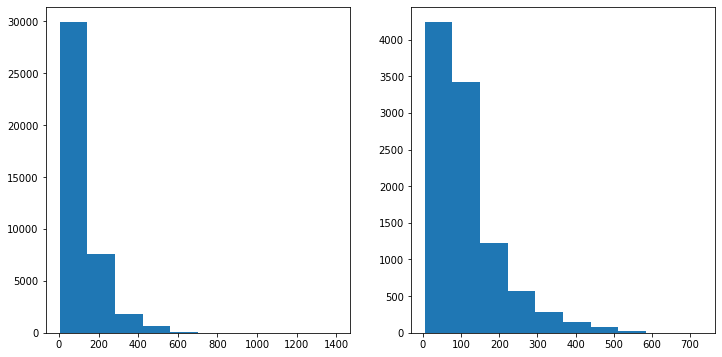

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

train_lens = [len(s) for s in train_sequences]
test_lens = [len(s) for s in test_sequences]

fig, ax = plt.subplots(1,2, figsize=(12, 6))
h1 = ax[0].hist(train_lens)
h2 = ax[1].hist(test_lens)

### Sequence Normalization

Not all reviews are of same length. To handle this difference in length of reviews, we define a maximum length.
For reviews which are smaller than this length, we pad them with zeros which longer ones are truncated

In [ ]:
MAX_SEQUENCE_LENGTH = 1000

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# pad dataset to a maximum review length in words
X_train = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_train.shape, X_test.shape

((40000, 1000), (10000, 1000))

### Encoding Labels

The dataset contains labels of the form positive/negative. The following step encodes the labels using ```sklearn's``` ```LabelEncoder```

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
num_classes = 2 # positive -> 1, negative -> 0

In [ ]:
y_train = le.fit_transform(train_data.sentiment)
y_test = le.transform(test_data.sentiment)

## Prepare the Model

Since textual data is a sequence of words, we utilize ```1D``` convolutions to scan through the sentences.
The model first transforms each word into lower dimensional embedding/vector space followed by 1d convolutions and then passing the data through dense layers before the final layer for classification

In [ ]:
EMBED_SIZE = 300
EPOCHS = 2
BATCH_SIZE = 128
VOCAB_SIZE = len(tokenizer.word_index)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Embedding

# create the model
model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBED_SIZE, input_length=MAX_SEQUENCE_LENGTH))
model.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 1000, 300)         27807000  
                                                                 
 conv1d_21 (Conv1D)          (None, 1000, 128)         153728    
                                                                 
 max_pooling1d_21 (MaxPoolin  (None, 500, 128)         0         
 g1D)                                                            
                                                                 
 conv1d_22 (Conv1D)          (None, 500, 64)           32832     
                                                                 
 max_pooling1d_22 (MaxPoolin  (None, 250, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_23 (Conv1D)          (None, 250, 32)          

## Model Training

In [ ]:
# Fit the model
model.fit(X_train, y_train, 
          validation_split=0.1,
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          verbose=1)

Epoch 1/2
282/282 [==============================] - 25s 85ms/step - loss: 0.3776 - accuracy: 0.8038 - val_loss: 0.2443 - val_accuracy: 0.8975
Epoch 2/2
282/282 [==============================] - 23s 83ms/step - loss: 0.1297 - accuracy: 0.9538 - val_loss: 0.3182 - val_accuracy: 0.8785


## Model Evaluation

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

313/313 [==============================] - 3s 11ms/step - loss: 0.3277 - accuracy: 0.8806
Accuracy: 88.06%


In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
predictions[:10]

313/313 [==============================] - 2s 6ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0]], dtype=int32)

In [ ]:
y_test[:10]

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
predictions = ['positive' if item == 1 else 'negative' for item in predictions]
predictions[:10]

['negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative']

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

labels = ['negative', 'positive']
print(classification_report(test_data.sentiment, predictions))
pd.DataFrame(confusion_matrix(test_data.sentiment, predictions), index=labels, columns=labels)

              precision    recall  f1-score   support

    negative       0.89      0.90      0.90      4961
    positive       0.90      0.89      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



,negative,positive
negative,4466,495
positive,534,4505


## Train our own Embedding using Word2Vec

In [ ]:
from gensim.models.word2vec import Word2Vec

sentences = [row.split() for row in train_data.review]
word2vec_model = Word2Vec(sentences, size=EMBED_SIZE, window=5, min_count=1, workers=16)
print(word2vec_model)

Word2Vec(vocab=92690, size=300, alpha=0.025)


In [ ]:
print(word2vec_model.wv.most_similar('mafia'))

[('mob', 0.8272112607955933), ('terrorising', 0.8021698594093323), ('murderers', 0.7973777055740356), ('kidnapping', 0.7965610027313232), ('vigilante', 0.7946603298187256), ('bikers', 0.7910242080688477), ('kidnap', 0.7833676934242249), ('crooked', 0.7792561650276184), ('terrorized', 0.7788373231887817), ('triad', 0.777696967124939)]


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Embedding, Input, LSTM

inp = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = word2vec_model.wv.get_keras_embedding()(inp)
x = Conv1D(filters=128, kernel_size=4, padding='same', activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)
x = Conv1D(filters=64, kernel_size=4, padding='same', activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)
x = Conv1D(filters=32, kernel_size=4, padding='same', activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
out = Dense(1, activation='sigmoid')(x)

model = Model(inp, out)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1000)]            0         
                                                                 
 embedding_10 (Embedding)    (None, 1000, 300)         27807000  
                                                                 
 conv1d_27 (Conv1D)          (None, 1000, 128)         153728    
                                                                 
 max_pooling1d_27 (MaxPoolin  (None, 500, 128)         0         
 g1D)                                                            
                                                                 
 conv1d_28 (Conv1D)          (None, 500, 64)           32832     
                                                                 
 max_pooling1d_28 (MaxPoolin  (None, 250, 64)          0         
 g1D)                                                      

In [ ]:
# Fit the model
model.fit(X_train, y_train, 
          validation_split=0.1,
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          verbose=1)

Epoch 1/2
282/282 [==============================] - 26s 91ms/step - loss: 0.3837 - accuracy: 0.8280 - val_loss: 0.3849 - val_accuracy: 0.8295
Epoch 2/2
282/282 [==============================] - 26s 92ms/step - loss: 0.3351 - accuracy: 0.8562 - val_loss: 0.3613 - val_accuracy: 0.8365


In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

313/313 [==============================] - 6s 20ms/step - loss: 0.3641 - accuracy: 0.8396
Accuracy: 83.96%
